In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df= pd.read_csv("data.csv",encoding='latin1',parse_dates=['date'])

C:\Users\snehe\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [32]:
df.shape

(435742, 13)

In [33]:
df.date.nunique()

5067

In [34]:
df.agency.nunique()

64

In [35]:
df.agency.value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

In [36]:
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

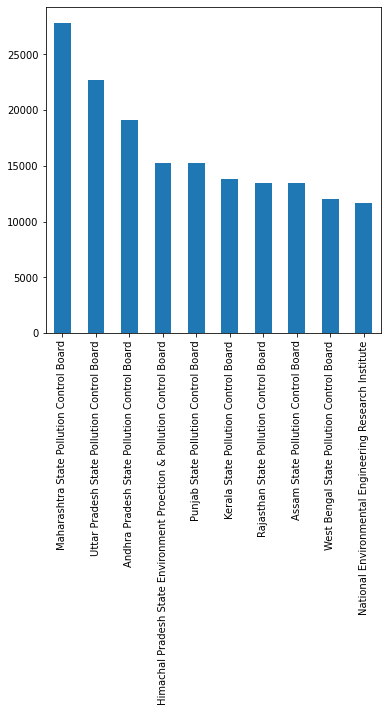

In [37]:
df['agency'].value_counts().head(10).plot.bar( 
                                             figsize=(6,6))
plt.show()

In [38]:
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

In [39]:
cols_to_drop = ['stn_code','sampling_date','agency','location_monitoring_station']
df.drop(cols_to_drop,axis=1,inplace=True)

In [40]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


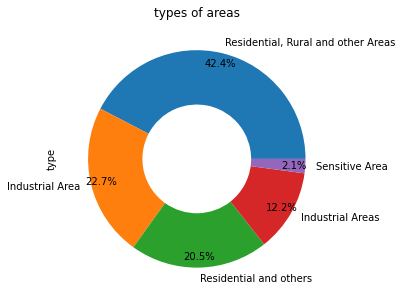

In [41]:
df['type'].value_counts().head().plot.pie(figsize=(5,5), 
                                         wedgeprops={'width':.5},
                                         radius=1,
                                         title="types of areas",
                                         autopct='%.1f%%',
                                         pctdistance =.9,
                                        
                                          textprops={'color':'black'})
plt.show()

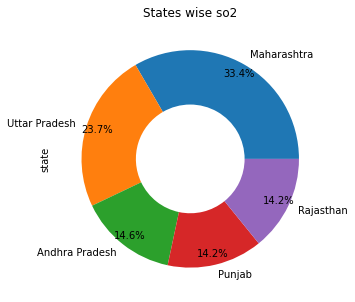

In [43]:
df['state'].value_counts().head().plot.pie(figsize=(5,5), 
                                         wedgeprops={'width':.5},
                                         radius=1,
                                         title="States wise so2",
                                         autopct='%.1f%%',
                                         pctdistance =.9,
                                        
                                          textprops={'color':'black'})
plt.show()

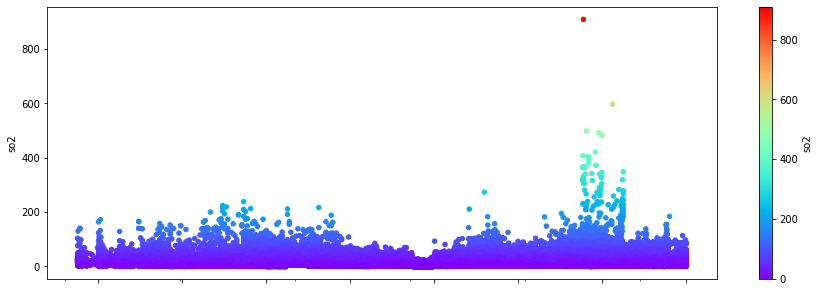

In [ ]:
df.plot.scatter(x='date',y='so2',figsize=(15,5),c='so2',cmap="rainbow")
plt.show()

In [ ]:
df['type'].value_counts()


Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [ ]:
data=df.so2
data

0          4.8
1          3.1
2          6.2
3          6.3
4          4.7
          ... 
435737    22.0
435738    20.0
435739     NaN
435740     NaN
435741     NaN
Name: so2, Length: 435742, dtype: float64

In [ ]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


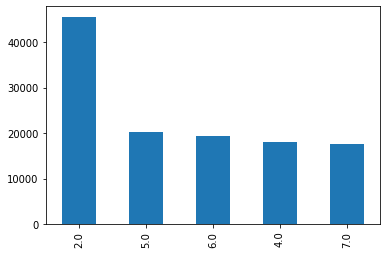

In [ ]:
df['so2'].value_counts().head().plot.bar()
plt.show()

In [ ]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

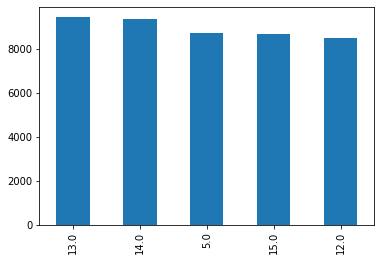

In [ ]:
df['no2'].value_counts().head().plot.bar()
plt.show()


In [ ]:
s=df['state'].value_counts()
a=df['so2'].value_counts()

In [ ]:
p=s.size
p

37

In [ ]:
q=a.size
q

4197

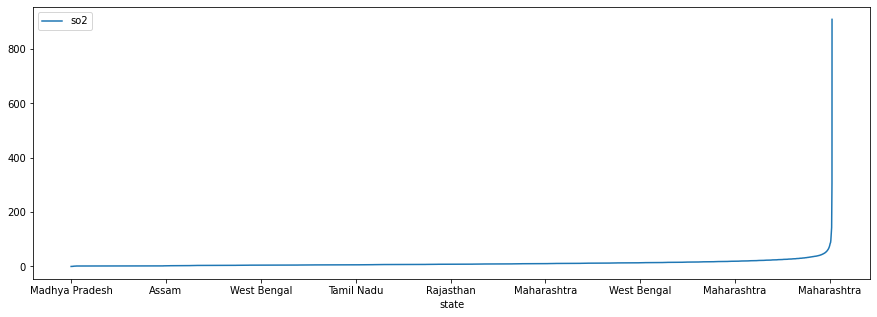

In [ ]:
df.plot.line(x='state',y='so2',figsize=(15,5))
plt.show()

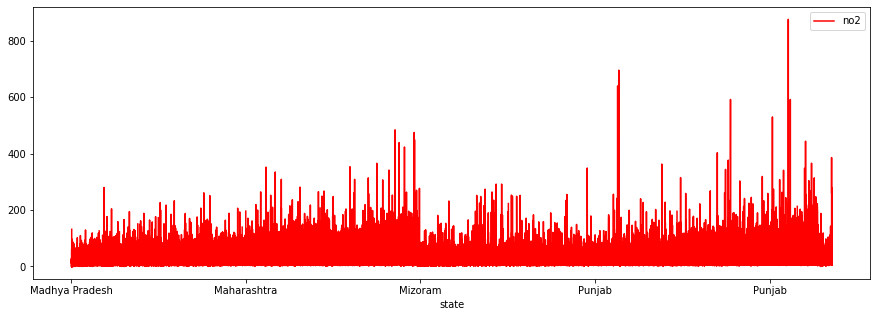

In [ ]:
df.plot.line(x='state',y='no2',figsize=(15,5),color='red')
plt.show()

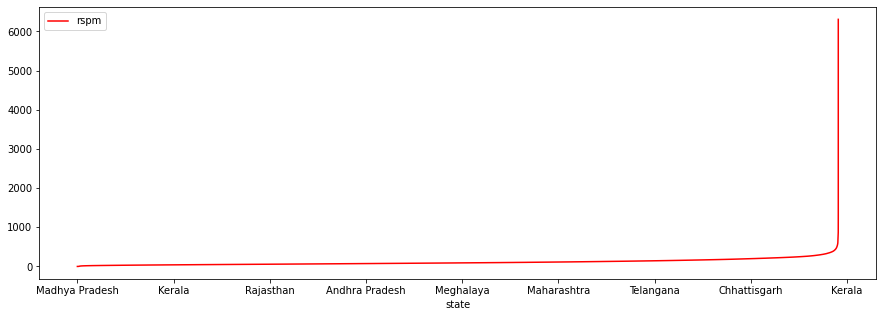

In [ ]:
df.plot.line(x='state',y='rspm',figsize=(15,5),color='red')
plt.show()


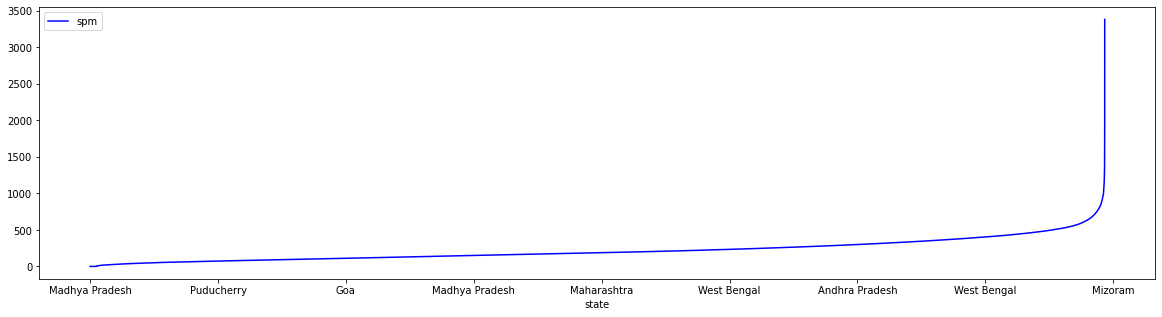

In [ ]:
df.plot.line(x='state',y='spm',figsize=(20,5),color='blue')
plt.show()

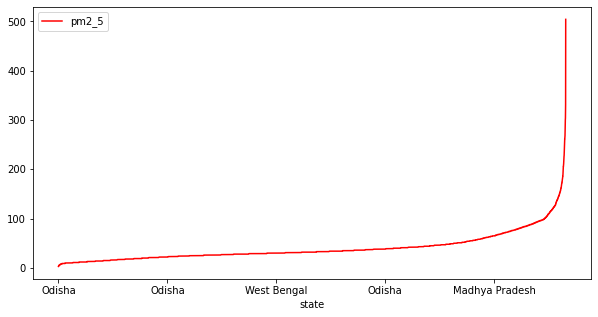

In [ ]:
df.plot.line(x='state',y='pm2_5',figsize=(10,5),color='red')
plt.show()


In [ ]:
df.sort_values(by='spm',inplace=True)

In [ ]:
df.sort_values(by='rspm',inplace=True)

In [ ]:
df.sort_values(by='pm2_5',inplace=True)

In [ ]:
df.state

177615                 Madhya Pradesh
82924                         Gujarat
74583                             Goa
82932                         Gujarat
82933                         Gujarat
                     ...             
433149                    West Bengal
433551                    West Bengal
435739    andaman-and-nicobar-islands
435740                    Lakshadweep
435741                        Tripura
Name: state, Length: 435742, dtype: object